In [1]:
import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


Training Data: (60000, 28, 28)
Training Labels: (60000,)
Training Data: (10000, 28, 28)
Training Labels: (10000,)


/Users/aymericschneider/opt/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


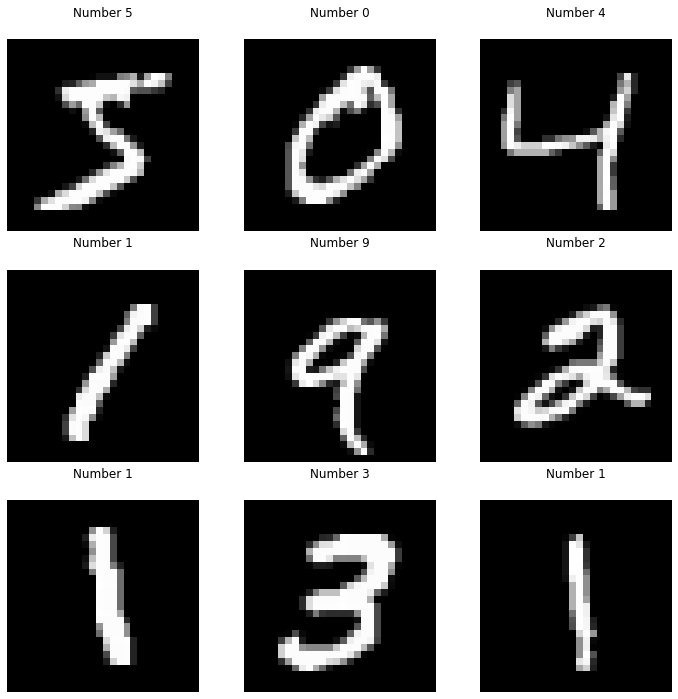

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

#Training Data: (60000L, 28L, 28L)
#Training Labels: (60000L,)

print('Training Data: {}'.format(x_test.shape))
print('Training Labels: {}'.format(y_test.shape))

#Testing Data: (10000L, 28L, 28L)
#Testing Labels: (10000L,)

# EDA

fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))

fig.show()

In [3]:
# convert each image to 1 dimensional array

X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1

X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

#(60000L, 784L)
#(784L,)

(60000, 784)
(784,)


## 1. KMeans

### Nombre de Clusters

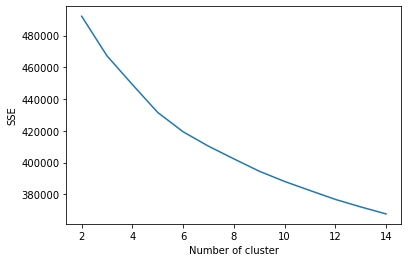

In [8]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

sse = {}

for k in range(2, 15):

    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X[:10000])

    #data["clusters"] = kmeans.labels_

    #print(data["clusters"])

    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()

plt.plot(list(sse.keys()), list(sse.values()))

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

### Affichage des représentants pour n_clusters = 6

/Users/aymericschneider/opt/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


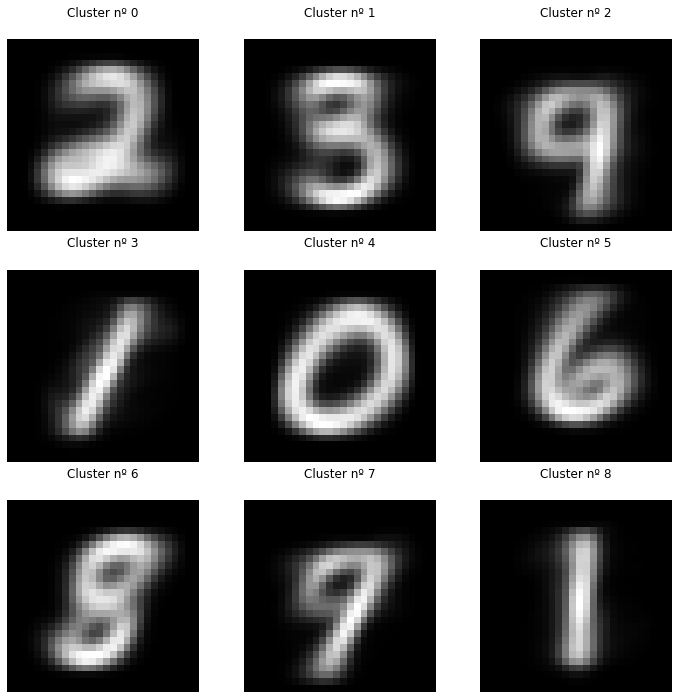

In [55]:
kmeans = KMeans(n_clusters = 9, max_iter=1000).fit(X)

clusters = kmeans.cluster_centers_

fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.matshow(clusters[i].reshape((28, -1)))
    ax.axis('off')
    ax.set_title('Cluster nº %d' % (i + 1))

fig.show()

## Dendrogramme

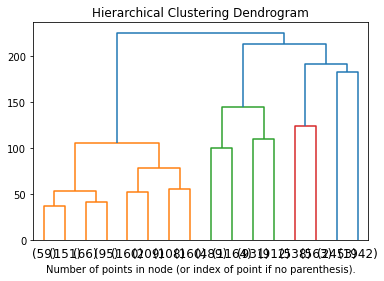

In [7]:

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X[:10000])
plt.title('Hierarchical Clustering Dendrogram')

# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()



### KMedoids

In [4]:
from sklearn_extra.cluster import KMedoids

In [ ]:
kmeans = KMedoids(n_clusters = 9, max_iter=1000).fit(X)

clusters = kmeans.cluster_centers_

fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.matshow(clusters[i].reshape((28, -1)))
    ax.axis('off')
    ax.set_title('Cluster nº %d' % (i + 1))

fig.show()